## Question 1 - Recognize triangles and squares using a bank of orientation-selective 2D Gabor filters

In [232]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

from skimage import data
from skimage.util import img_as_float
from skimage.filters import gabor_kernel
import cv2

#Gabor function
def gbr(size, sigma, theta, lambd, gamma, psi):
    return cv2.getGaborKernel(size, sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
# Prepare filter bank kernels
kernels = []
kernel = gbr((10, 10), 1.5, np.pi/2, 2, 1, 0)
kernels.append(kernel)
kernel = gbr((10, 10), 1, np.pi/2, 2, 1, 0)
kernels.append(kernel)
kernel = gbr((10, 10), 1, np.pi/1, 2, 1, 0)
kernels.append(kernel)


print(kernels[0].shape)

(11, 11)


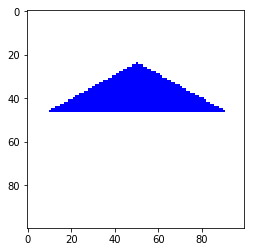

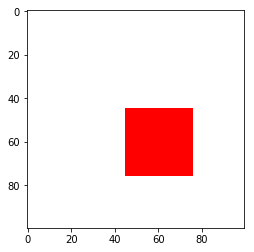

In [233]:
#Function for getting Square
def getSquare(x, y, w,color,image):
    pt1=(int(x-w/2),int(y-w/2))
    pt2=(int(x+w/2),int(y+w/2))
    cv2.rectangle(image, pt1, pt2, color, -1)
    return image
#Function for getting Triangle
def getTriangle(x,y,h,color,image):
    pt1=(x,int(y-0.57*h))
    pt2=(int(x-h/2),int(y-0.29*h))
    pt3=(int(x+h/2),int(y-0.29*h))
    triangle_cnt = np.array([pt1, pt2, pt3])
    cv2.drawContours(image, [triangle_cnt], 0, color, -1)
    return image
#Generating Sqaure and Triangle
x,y,h=50,70,80
red=(255,0,0)
blue=(0,0,255)
image = np.ones((100, 100, 3), np.uint8) * 255
tri1 = getTriangle(x, y, h,blue,image)
plt.imshow(tri1, cmap='gray')
plt.show()
tri1=cv2.cvtColor(tri1, cv2.COLOR_BGR2GRAY)

image1 = np.ones((100, 100, 3), np.uint8) * 255
x,y,h=50,50,80
tri2 = getTriangle(x, y, h,red,image1)
tri2=cv2.cvtColor(tri2, cv2.COLOR_BGR2GRAY)


#plt.imshow(tri1,cmap='gray')
image2= np.ones((100, 100, 3), np.uint8) * 255
squ1=getSquare(60,60, 30,red,image2)
plt.imshow(squ1,cmap='gray')
plt.show()
squ1=cv2.cvtColor(squ1, cv2.COLOR_BGR2GRAY)

image3= np.ones((100, 100, 3), np.uint8) * 255
squ2=getSquare(60,60, 30,red,image3)
squ2=cv2.cvtColor(squ2, cv2.COLOR_BGR2GRAY)

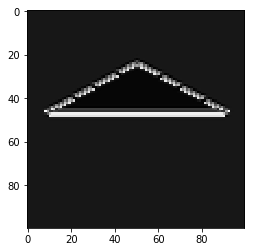

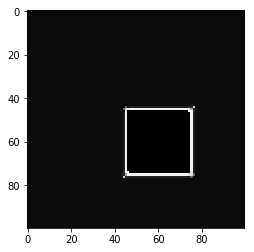

In [234]:
kernel = gbr((10, 10), 1, np.pi/2, 2, 1, 0)
filterd = ndi.convolve(tri1, kernel, mode='wrap')
filterd = (filterd - np.mean(filterd))/np.max(filterd)
normalise = filterd
normalise = cv2.normalize(filterd, normalise, norm_type=cv2.NORM_MINMAX)
plt.imshow(normalise, cmap='gray')
plt.show()

kernel = gbr((10, 10), 1, np.pi/4, 2, 1, 0)
filterd = ndi.convolve(squ2, kernel, mode='wrap')
filterd = (filterd - np.mean(filterd))/np.max(filterd)
normalise = filterd
normalise = cv2.normalize(filterd, normalise, norm_type=cv2.NORM_MINMAX)
plt.imshow(normalise, cmap='gray')
plt.show()

In [235]:
#Image list
image_names = ('square', 'triangle')
images = (squ1, tri1)


In [236]:
#Compute feature after convolution
def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(image, kernel, mode='wrap')
        #print(filtered)
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats

In [237]:
#Generate Reference Image
ref_feats = np.zeros((3, len(kernels), 2), dtype=np.double)
ref_feats[0, :, :] = compute_feats(squ1, kernels)
ref_feats[1, :, :] = compute_feats(tri1, kernels)

In [238]:
#Function For checking match refrence image with given image
def match(feats, ref_feats):
    min_error = np.inf
    min_i = None
    for i in range(ref_feats.shape[0]):
        error = np.sum((feats - ref_feats[i, :])**2)
        if error < min_error:
            min_error = error
            min_i = i
    return min_i

In [239]:
#Recognise Square and  Triangle
feats = compute_feats(tri2, kernels)
print(image_names[match(feats, ref_feats)])
feats = compute_feats(squ2, kernels)
print(image_names[match(feats, ref_feats)])




triangle
square


## Question 2 - Triesman visual search image creation

In [240]:
import random

#List of Random point for Sqaure and Triangle position
def listOfCenter(start,end,space,num):
    k=0
    l=[]
    while k < num:
        i=random.randrange(start,end,space)
        j=random.randrange(start,end,space)
        if (i,j) not in l:
            l.append((i,j))
            k+=1
    return l
def addSquToList(x,y,sqcolor,allShape):
    canv = np.ones((500, 500, 3), np.uint8) * 255
    temp=[]
    temp=getSquare(x,y, 30,sqcolor,canv)
    allShape.append(temp)
def addTriToList(x,y,tricolor,allShape):
    canv = np.ones((500, 500, 3), np.uint8) * 255
    temp=[]
    temp=getTriangle(x,y,50,tricolor,canv)
    allShape.append(temp)
    
def getSquare(x, y, w,color,image):
    pt1=(int(x-w/2),int(y-w/2))
    pt2=(int(x+w/2),int(y+w/2))
    cv2.rectangle(image, pt1, pt2, color, -1)
    return image
def getTriangle(x,y,h,color,image):
    pt1=(x,int(y-0.57*h))
    #points2.append(pt1)
    pt2=(int(x-h/2),int(y-0.29*h))
    pt3=(int(x+h/2),int(y-0.29*h))
    triangle_cnt = np.array([pt1, pt2, pt3])
    cv2.drawContours(image, [triangle_cnt], 0, color, -1)
    return image
#Function for feature search
def featureSearch(shapeType,sqcolor,tricolor,num,image,allShape,points):
    #allShape=[]
    if shapeType == "square" :
        l =listOfCenter(60,500,60,num)
        for i in range(len(l)-1):
            x,y=l[i]
            points.append((x,y))
            getSquare(x,y, 30,sqcolor,image)
            addSquToList(x,y,sqcolor,allShape)
        if sqcolor == (255,0,0):
            sqcolor=(0,0,255)
        else:
            sqcolor = (255,0,0)
        x,y=l[len(l)-1]
        points.append((x,y))
        getSquare(x,y, 30,sqcolor,image)
        addSquToList(x,y,sqcolor,allShape)
    elif shapeType == "triangle" :
        l =listOfCenter(60,500,60,num)
        for i in range(len(l)-1):
            x,y=l[i]
            points.append((x,y))
            getTriangle(x,y,50,tricolor,image)
            addTriToList(x,y,tricolor,allShape)   
        if tricolor == (255,0,0):
            tricolor=(0,0,255)
        else:
            tricolor = (255,0,0)
        x,y=l[len(l)-1]
        points.append((x,y))
        getTriangle(x,y,50,tricolor,image)
        addTriToList(x,y,tricolor,allShape)
    return image
#Function for Conjuction search
def conjuncSearch (sqcolor,tricolor,num,image,allShape,points):
    l =listOfCenter(60,500,60,num)
    for i in range(len(l)-1):
        x,y=l[i]
        points.append((x,y))
        #print("x,y",x,y)
        if i%2==0:
            getSquare(x,y, 30,sqcolor,image)
            addSquToList(x,y,sqcolor,allShape)
        else:
            getTriangle(x,y,50,tricolor,image)
            addTriToList(x,y,tricolor,allShape)
    x,y=l[len(l)-1]
    points.append((x,y))
    if len(l)%2 ==0:
        if tricolor == (255,0,0):
            tricolor=(0,0,255)
        else:
            tricolor = (255,0,0)
        getTriangle(x,y,50,tricolor,image)
        addTriToList(x,y,tricolor,allShape)
        
    else:
        if sqcolor == (255,0,0):
            sqcolor=(0,0,255)
        else:
            sqcolor = (255,0,0)
        getSquare(x,y, 30,sqcolor,image)
        addSquToList(x,y,sqcolor,allShape)
    
    
    return image
#Visual Search Function
def visualSearch(searchType,shapeType,sqcolor,tricolor,num,image,allShape,points):
    
    if searchType == "feature":
        image=featureSearch(shapeType,sqcolor,tricolor,num,image,allShape,points)           
    elif searchType == "conjunction":
        image=conjuncSearch (sqcolor,tricolor,num,image,allShape,points)
            
    return image


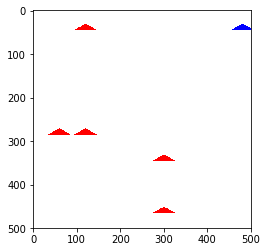

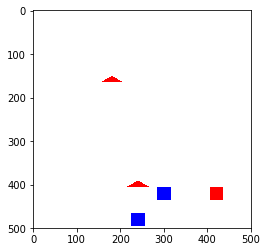

In [247]:
#Generate Visual Search Image for Feature and conjunction
red=(255,0,0)
blue=(0,0,255)
image1 = np.ones((500, 500, 3), np.uint8) * 255
image2 = np.ones((500, 500, 3), np.uint8) * 255
if random.randint(0,1)==0:
    shape="square"
else:
    shape="triangle"
if random.randint(0,1)==0:
    tricolor=red
    sqcolor =blue
else:
    tricolor=blue
    sqcolor =red
allShape=[]
points=[]
im=visualSearch("feature",shape,sqcolor,tricolor,6,image2,allShape,points)
plt.imshow(im)
plt.show()
#cv2.imwrite('feature.jpg',im)
im=visualSearch("conjunction",shape,sqcolor,tricolor,5,image1,allShape,points)
plt.imshow(im)
plt.show()
#cv2.imwrite('conjunction.jpg',im)

## Question 3- Perform feature search and Conjuction Search and plot the time

In [242]:
x,y,h=60,60,50
red=(255,0,0)
blue=(0,0,255)

image = np.ones((500, 500, 3), np.uint8) * 255
tri1 = getTriangle(x, y, h,blue,image)
tri1=cv2.cvtColor(tri1, cv2.COLOR_BGR2GRAY)


image2= np.ones((500, 500, 3), np.uint8) * 255
squ1=getSquare(60,60, 30,red,image2)
squ1=cv2.cvtColor(squ1, cv2.COLOR_BGR2GRAY)

#Generate Reference Image
ref_feats = np.zeros((2, len(kernels), 2), dtype=np.double)
ref_feats[0, :, :] = compute_feats(squ1, kernels)
ref_feats[1, :, :] = compute_feats(tri1, kernels)

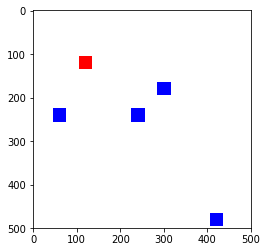

odd_one:  red
time:  150


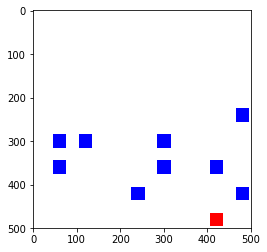

odd_one:  red
time:  200


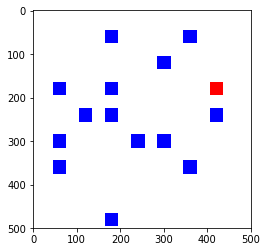

odd_one:  red
time:  200


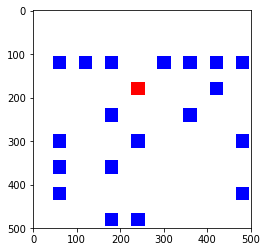

odd_one:  red
time:  200


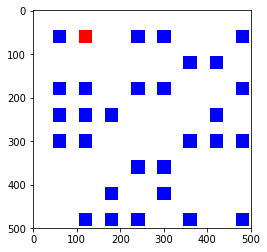

odd_one:  red
time:  250


In [243]:
#Feature Search
import time
ftimeList=[]
for num in (5,10,15,20,30):
    allShape=[]
    points=[]
    image = np.ones((500, 500, 3), np.uint8) * 255
    shape_color=['red','blue']
    randomNum=random.randint(0,1)
    color_count=[0,0]    
    im=visualSearch("feature",shape,blue,red,num,image,allShape,points)
    plt.imshow(im)
    plt.show()
    start = int(time.time() * 10000)
    for i in range(len(allShape)):
        #Finding color
        x,y=points[i]
        if shape=="square":
            if im[y,x][0]==255:
                color_count[0]=color_count[0]+1
            elif im[y,x][2]==255:
                color_count[1]=color_count[1]+1
        elif shape=="triangle":
            m=int((x+(x-25)+(x+23))/3)
            n=int(((y-28)+(y-14)*2)/3)
            if im[n,m][0]==255:
                color_count[0]=color_count[0]+1
            elif im[n,m][2]==255:
                color_count[1]=color_count[1]+1
    ind=color_count.index(1)
    odd=shape_color[ind]
    print("odd_one: ",odd)
    end = int(time.time() * 10000)
    tim= int((end -start)*50)
    ftimeList.append(tim)
    print("time: ",tim)


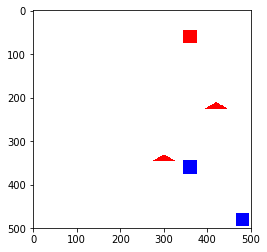

odd_one: square and red
time: 298


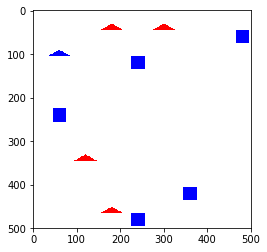

odd_one: triangle blue
time: 1084


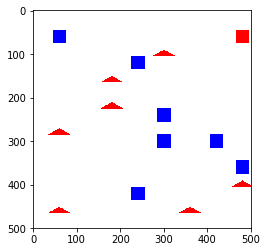

odd_one: square and red
time: 2382


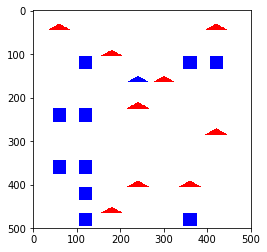

odd_one: triangle blue
time: 4159


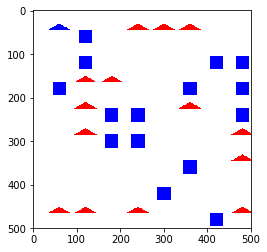

odd_one: triangle blue
time: 9249


In [245]:
#Conjuction Search
import time
ctimeList=[]
for num in (5,10,15,20,30):
    allShape=[]
    points=[]
    image = np.ones((500, 500, 3), np.uint8) * 255
    shape_color=['square and red','square and blue','triangle red','triangle blue']
    color_count=[0,0,0,0]
    im=visualSearch("conjunction",shape,blue,red,num,image,allShape,points)
    plt.imshow(im)
    plt.show()
    start = int(time.time() * 100)
    for i in range(len(allShape)):
        img=cv2.cvtColor(allShape[i], cv2.COLOR_BGR2GRAY)
        feats = compute_feats(img, kernels)
        #Finding 
        sh=image_names[match(feats, ref_feats)]
        time.sleep(.200*num)
        #Finding color
        x,y=points[i]
        if sh=="square":
            if im[y,x][0]==255:
                color_count[0]=color_count[0]+1
            elif im[y,x][2]==255:
                color_count[1]=color_count[1]+1
            
        elif sh=="triangle":
            m=int((x+(x-25)+(x+23))/3)
            n=int(((y-28)+(y-14)*2)/3)
            if im[n,m][0]==255:
                color_count[2]=color_count[2]+1
            elif im[n,m][2]==255:
                color_count[3]=color_count[3]+1
    ind=color_count.index(1)
    odd=shape_color[ind]
    print("odd_one:",odd)
    end = int(time.time() * 100)
    tim= int((end -start)/2)
    ctimeList.append(tim)
    print('time:', tim)


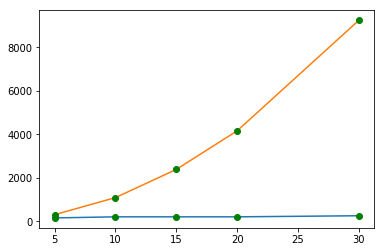

In [246]:
x=[5,10,15,20,30]
plt.plot(x,ftimeList)
for p in range(5):
    plt.plot(x[p],ftimeList[p],color='g', marker='o')
plt.plot(x,ctimeList)
for p in range(5):
    plt.plot(x[p],ctimeList[p],color='g', marker='o')